# **Project Name**    - **TWITTER SENTIMENT ANALYSIS**


##### **Project Type**    - **Sentiment Analysis**
##### **Name - SHEIKH MOSTAQUL ARIF**      

# **Project Summary -**

# **GitHub Link -**

https://github.com/Mostaqul143

# **Problem Statement**


Given tweets about six US airlines, the task is to predict whether a tweet contains positive, negative, or neutral sentiment about the airline. This is a typical supervised learning task where given a text string, we have to categorize the text string into predefined categories.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [688]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
string.punctuation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


[nltk_data] Downloading package punkt to C:\Users\MOSTAQUL
[nltk_data]     ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\MOSTAQUL
[nltk_data]     ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MOSTAQUL
[nltk_data]     ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Dataset Loading

In [689]:
# Load Dataset

df=pd.read_csv('Tweets.csv')

### Dataset First View

In [690]:
# Dataset First Look

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Dataset Rows & Columns count

In [691]:
# Dataset Rows & Columns count

print(f"Number Of Rows {df.shape[0]}")
print(f"Number Of Columns {df.shape[1]}")

Number Of Rows 14640
Number Of Columns 15


### Dataset Information

In [692]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

#### Duplicate Values

In [693]:
# Dataset Duplicate Value Count

num_duplicates = df.duplicated().sum()
print(f"Number of Duplicate Values: {num_duplicates}")

Number of Duplicate Values: 36


#### Missing Values/Null Values

In [694]:
# Missing Values/Null Values Count

num_missing = df.isnull().sum()
print("Number of Missing Values:\n", num_missing)

Number of Missing Values:
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [695]:
df.shape

(14640, 15)

In [696]:
#total null values
df.isnull().sum().sum()

61962

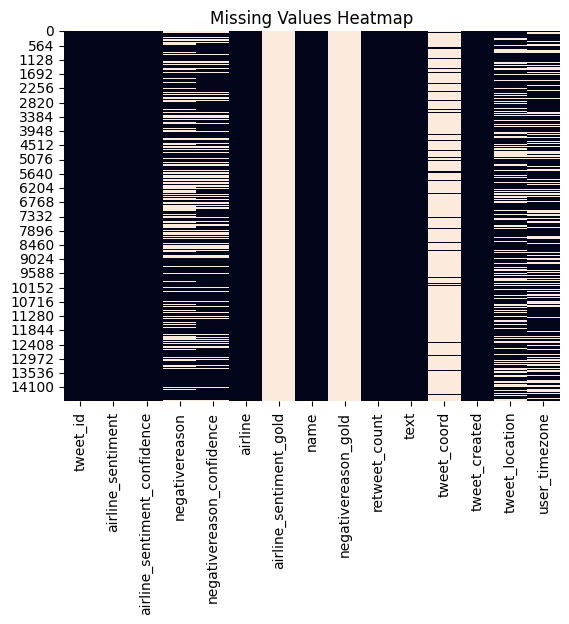

In [697]:


# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

**There are  14640 Number of  Rows and 15 Numbers of Columns Present in my dataset.**

**There are 4 Numerical Columns and 11 Categorical Columns Present in my Dataset**

**There are Total 61962 No Missing Values Present in my Dataset.**

**There are 36 Number Of Duplicate Values Present in my  Dataset.**

## ***2. Understanding Your Variables***

In [698]:
# Dataset Columns

df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [699]:
# Dataset Describe

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14640.00,NaN,NaN,NaN,569218351767499200.00,779111158481835.88,567588278875213824.00,568559178101439488.00,569477857923110912.00,569890473289000960.00,570310600460525568.00
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14640.00,NaN,NaN,NaN,0.90,0.16,0.34,0.69,1.00,1.00,1.00
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10522.00,NaN,NaN,NaN,0.64,0.33,0.00,0.36,0.67,1.00,1.00
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14640,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14640.00,NaN,NaN,NaN,0.08,0.75,0.00,0.00,0.00,0.00,44.00


### Variables Description 

* **tweet_id:** A unique identifier for each tweet.

* **airline_sentiment:** The sentiment expressed in the tweet (positive, negative, or neutral).

* **airline_sentiment_confidence:** Confidence score associated with the sentiment prediction.

* **negativereason:** The reason for a negative sentiment (if the sentiment is negative).

* **negativereason_confidence:** Confidence score associated with the negative reason prediction (if the sentiment is negative).

* **airline:** The airline mentioned in the tweet.

* **airline_sentiment_gold:** Gold standard sentiment label for quality assurance (rarely available).

* **name:** The Twitter username of the person who tweeted.

* **negativereason_gold:** Gold standard reason for quality assurance (rarely available).

* **retweet_count:** The number of times the tweet was retweeted.

* **text:** The content of the tweet.

* **tweet_coord:** Coordinates associated with the tweet location (if available).

* **tweet_created:** The timestamp when the tweet was created.

* **tweet_location:** The location information provided by the user (if available).

* **user_timezone:** The timezone of the user who tweeted (if available).

### Check Unique Values for each variable.

In [700]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  tweet_id is 14485 .
No. of unique values in  airline_sentiment is 3 .
No. of unique values in  airline_sentiment_confidence is 1023 .
No. of unique values in  negativereason is 10 .
No. of unique values in  negativereason_confidence is 1410 .
No. of unique values in  airline is 6 .
No. of unique values in  airline_sentiment_gold is 3 .
No. of unique values in  name is 7701 .
No. of unique values in  negativereason_gold is 13 .
No. of unique values in  retweet_count is 18 .
No. of unique values in  text is 14427 .
No. of unique values in  tweet_coord is 832 .
No. of unique values in  tweet_created is 14247 .
No. of unique values in  tweet_location is 3081 .
No. of unique values in  user_timezone is 85 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [701]:
# Write your code to make your dataset analysis ready.

#Changing The datatype of "tweet_created" column from object to date time format

df['tweet_created']=pd.to_datetime(df['tweet_created'])

In [702]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype                    
---  ------                        --------------  -----                    
 0   tweet_id                      14640 non-null  int64                    
 1   airline_sentiment             14640 non-null  object                   
 2   airline_sentiment_confidence  14640 non-null  float64                  
 3   negativereason                9178 non-null   object                   
 4   negativereason_confidence     10522 non-null  float64                  
 5   airline                       14640 non-null  object                   
 6   airline_sentiment_gold        40 non-null     object                   
 7   name                          14640 non-null  object                   
 8   negativereason_gold           32 non-null     object                   
 9   retweet_count                 14640 non

In [703]:
df['tweet_created'].min()

Timestamp('2015-02-16 23:36:05-0800', tz='UTC-08:00')

In [704]:
df['tweet_created'].max()

Timestamp('2015-02-24 11:53:37-0800', tz='UTC-08:00')

In [705]:
Number_Of_Tweets=df.groupby(df['tweet_created']).size()


In [706]:
#Here we can see tweets created every day

print(Number_Of_Tweets)

tweet_created
2015-02-16 23:36:05-08:00    1
2015-02-16 23:43:02-08:00    1
2015-02-16 23:48:48-08:00    1
2015-02-16 23:52:20-08:00    1
2015-02-17 00:00:36-08:00    1
2015-02-17 00:01:07-08:00    1
2015-02-17 00:05:27-08:00    1
2015-02-17 01:18:29-08:00    1
2015-02-17 01:30:32-08:00    1
2015-02-17 01:32:09-08:00    1
2015-02-17 01:54:53-08:00    1
2015-02-17 02:10:58-08:00    1
2015-02-17 02:23:03-08:00    1
2015-02-17 02:38:11-08:00    1
2015-02-17 03:14:32-08:00    1
2015-02-17 04:03:09-08:00    1
2015-02-17 04:33:32-08:00    1
2015-02-17 04:35:00-08:00    1
2015-02-17 04:50:05-08:00    1
2015-02-17 05:04:44-08:00    1
2015-02-17 05:07:11-08:00    1
2015-02-17 05:26:15-08:00    1
2015-02-17 05:27:09-08:00    1
2015-02-17 05:38:31-08:00    1
2015-02-17 05:40:59-08:00    1
2015-02-17 06:07:25-08:00    1
2015-02-17 06:07:45-08:00    1
2015-02-17 06:13:38-08:00    1
2015-02-17 06:13:59-08:00    1
2015-02-17 06:21:57-08:00    1
2015-02-17 06:29:14-08:00    1
2015-02-17 06:30:14-08:00

### What all manipulations have you done and insights you found?

*  **Changing The datatype of "tweet_created" column from object to date time format**


**Insights:**

* **We have Data from 16th feb 2015 to 24 feb 2015. We have data of 9 Days.**
* **Find The Number Of Tweets Everyday**


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

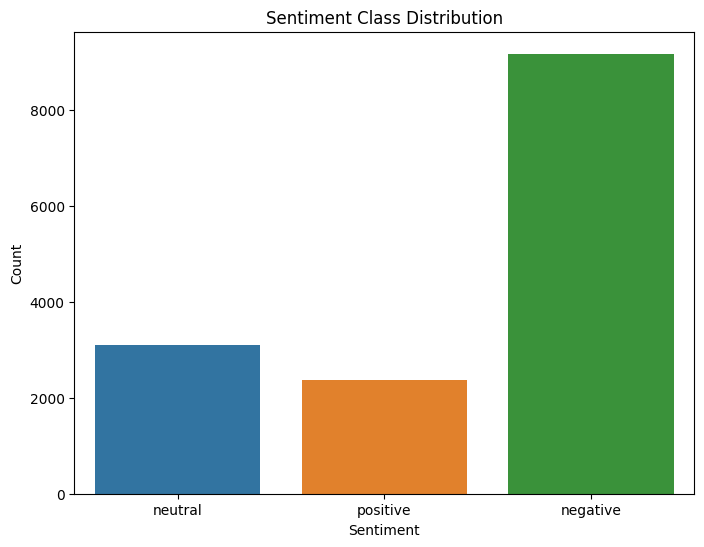

In [707]:
# Chart - 1 visualization code

# Plot the distribution of sentiment classes

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='airline_sentiment')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#####  What is/are the insight(s) found from the chart?

**This chart shows the distribution of sentiment classes, indicating that the dataset contains more negative tweets than positive or neutral ones.**

* **Neutral Sentiment: 3,044 tweets**
* **Positive Sentiment: 2,444 tweets**
* **Negative Sentiment: 9,152 tweets**

#### Chart - 2

In [708]:
df['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


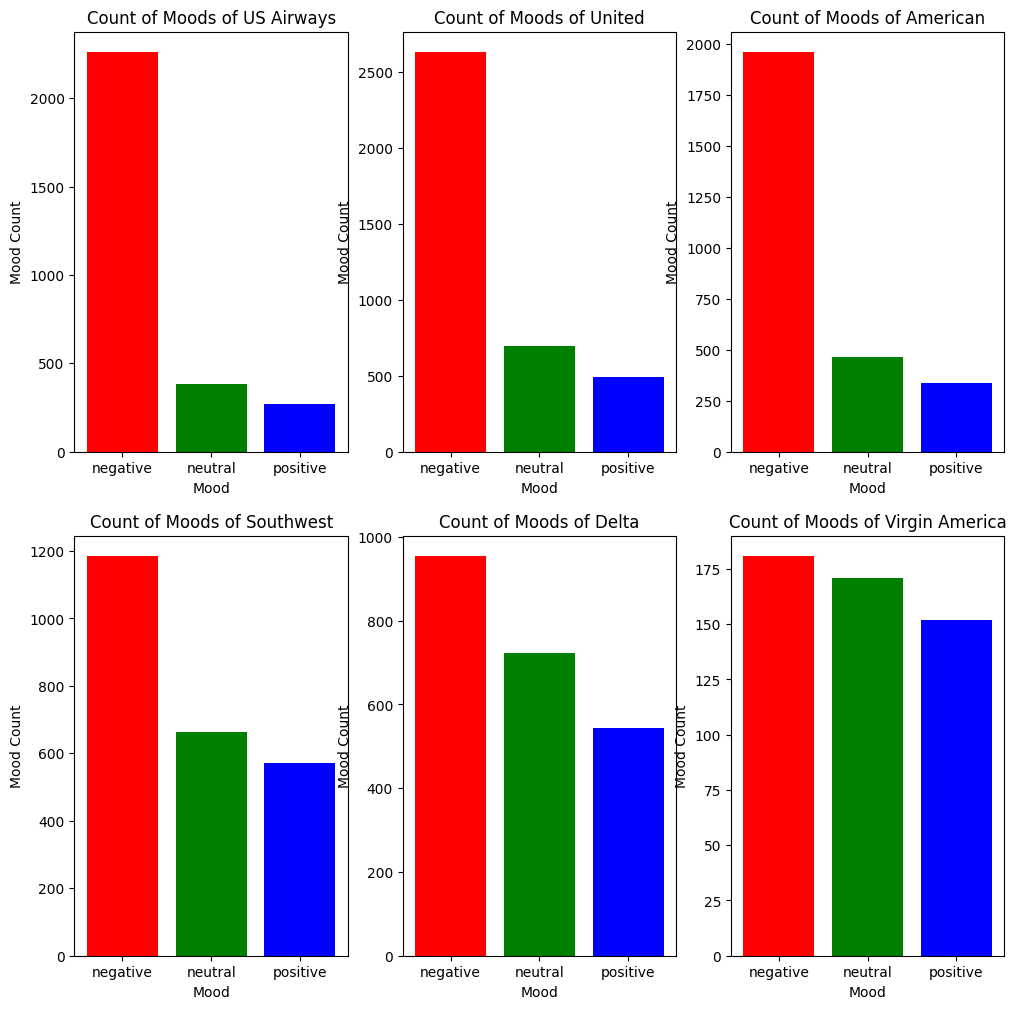

In [709]:
# Chart - 2 visualization code

print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

#####  What is/are the insight(s) found from the chart?

**This Chart visualizes sentiment by airline. It shows how each airline is perceived in terms of sentiment, with negative, neutral, and positive categories.**

* **United Airlines has the highest number of negative tweets, followed by US Airways and American Airlines.**

* **Virgin America has the lowest number of negative tweets among the airlines in the dataset.**

#### Chart - 3

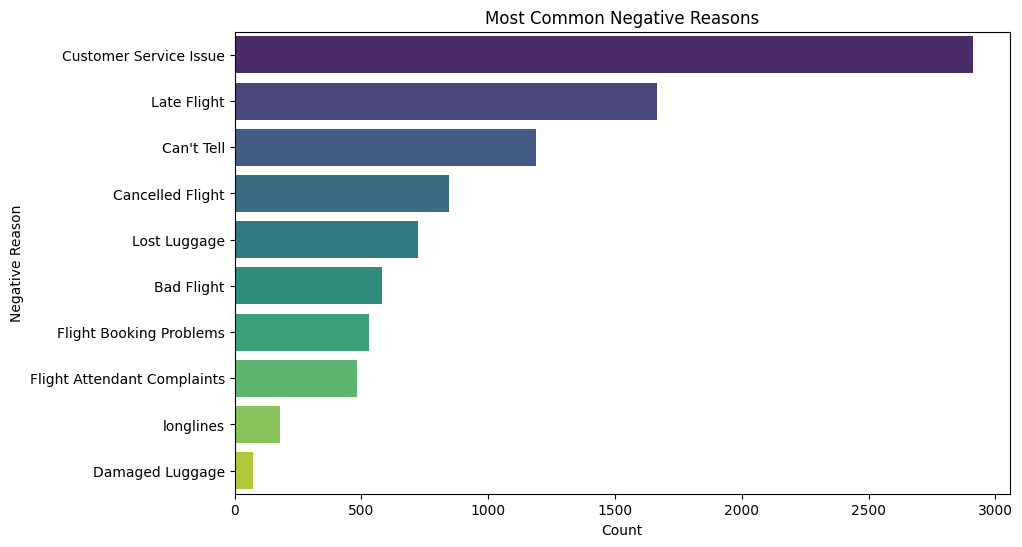

In [710]:
# Chart - 3 visualization code

# Plot the most common negative reasons
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='negativereason', order=df['negativereason'].value_counts().index, palette='viridis')
plt.title('Most Common Negative Reasons')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()

#####  What is/are the insight(s) found from the chart?

**This chart displays the most common negative reasons. "Customer Service Issue" appears to be the most frequent negative reason in the dataset.**

* **Customer Service Issue: 2910 tweets**
* **Late Flight: 1665 tweets**
* **Can't Tell: 1190 tweets**
* **Cancelled Flight: 847 tweets**
* **Lost Luggage: 724 tweets**

## ***5. Feature Engineering & Data Pre-processing***

In [711]:
# First of all let's drop the columns which we don't required

waste_col = ['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']

In [712]:
df = df.drop(waste_col, axis = 1)

In [713]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [714]:
# Expand Contraction

contraction_mapping = {
    "I'm": "I am",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "it's": "it is",
    "we're": "we are",
    "they're": "they are",
    "can't": "cannot",
    "won't": "will not",
    "don't": "do not",
    "doesn't": "does not",
    "didn't": "did not",
    "isn't": "is not",
    "aren't": "are not",
    "hasn't": "has not",
    "haven't": "have not",
}

# Function to expand contractions
def expand_contractions(text):
    words = text.split()
    expanded_words = [contraction_mapping.get(word, word) for word in words]
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Expand contractions in the "text" column
df['text'] = df['text'].apply(expand_contractions)

# Print the updated "text" column
print(df['text'][100])

@VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM


#### 2. Lower Casing

In [715]:
# Lower Casing

# Lowercase the text in the "describe" column
df['text'] = df['text'].str.lower()

# Print the updated "describe" column
print(df['text'][100])

@virginamerica trying to add my boy prince to my ressie. sf this thursday @virginamerica from lax http://t.co/gsb2j3c4gm


#### 3. Removing Punctuations

In [716]:
# Remove Punctuations

# function to remove punctuations

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [717]:
df['text']=df['text'].apply(remove_punctuation)

# Print the updated "text" column
print(df['text'][100])

virginamerica trying to add my boy prince to my ressie sf this thursday virginamerica from lax httptcogsb2j3c4gm


#### 4. Removing URLs & Removing words and digits contain digits.

In [718]:
# Function to remove URLs from a text
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)



In [719]:
# Remove URLs from the 'text' column
df['text'] = df['text'].apply(remove_urls)

# Remove words containing digits from the 'text' column using regex
df['text'] = df['text'].str.replace(r'\w*\d\w*', '', case=False)

# Display the modified 'text' column
print(df['text'][100])

virginamerica trying to add my boy prince to my ressie sf this thursday virginamerica from lax 


#### 5. Removing Stopwords & Removing White spaces

In [720]:
# Remove Stopwords

import nltk
from nltk.corpus import stopwords
sentences = stopwords.words('english')
# displaying the stopwords
np.array(sentences)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [721]:
# Get the set of stopwords
stopwords_set = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    words_without_stopwords = [word for word in words if word.lower() not in stopwords_set]
    text_without_stopwords = ' '.join(words_without_stopwords)
    return text_without_stopwords

In [722]:
# Remove stopwords from the "text" column
df['text'] = df['text'].apply(remove_stopwords)

# Print the updated "text" column
print(df['text'][100])

virginamerica trying add boy prince ressie sf thursday virginamerica lax


#### 6. Tokenization

In [723]:
# Tokenization

# Function to perform tokenization

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [724]:
# Tokenize the text in the "text" column
df['text'] = df['text'].apply(tokenize_text)

# Print the updated "description" column
print(df['text'][100])

['virginamerica', 'trying', 'add', 'boy', 'prince', 'ressie', 'sf', 'thursday', 'virginamerica', 'lax']


#### 7. Text Normalization

In [725]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [726]:
# Lemmatize the tokenized text in the "text" column

df['text'] = df['text'].apply(lemmatize_text)

# Print the updated "text" column
print(df['text'][100])

['virginamerica', 'trying', 'add', 'boy', 'prince', 'ressie', 'sf', 'thursday', 'virginamerica', 'lax']


##### Which text normalization technique have you used and why?

I chose lemmatization over other techniques like stemming because lemmatization produces more meaningful and linguistically accurate lemmas. Unlike stemming, lemmatization takes into account the context and part-of-speech of the words, resulting in lemmas that are closer to the actual word forms found in dictionaries. This helps in maintaining the interpretability and semantic integrity of the text.

By using lemmatization, I aimed to standardize the words in the "text" column to their base form, which can improve text analysis tasks such as keyword extraction, topic modeling, and sentiment analysis.

#### 8. Part of speech tagging

In [727]:
# POS Taging
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

def pos_tagging(tokens):
    pos_tags = pos_tag(tokens)
    return [word for word, tag in pos_tags]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MOSTAQUL ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [728]:
df['text'] = df['text'].apply(pos_tagging)

# Print the updated "text" column
print(df['text'][100])

['virginamerica', 'trying', 'add', 'boy', 'prince', 'ressie', 'sf', 'thursday', 'virginamerica', 'lax']


#### 9. Text Vectorization

In [729]:
# Vectorizing Text

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of tokens into a single string
df['text'] = df['text'].apply(' '.join)

#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=20000)
X_tfidf = tfidfmodel.fit_transform(df['text'])
X_tfidf.shape

(14640, 14450)

##### Which text vectorization technique have you used and why?

I chose TF-IDF vectorization for its ability to capture the importance of a term based on its frequency within a specific document and its rarity across the entire collection of documents. This approach helps to highlight the significance of specific terms that are unique or distinctive to a particular document, while downplaying commonly occurring terms that might not carry much discriminatory power.

### 8. Data Splitting

In [735]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [736]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [737]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [738]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [739]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [740]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [741]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [742]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [743]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [744]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [745]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [746]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***